# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

# Question 1

**Explain how you solve the model**

In [2]:
# code for solving the model (remember documentation and comments)

a = np.array([1,2,3])
b = inauguralproject.square(a)
print(b)

[1 4 9]


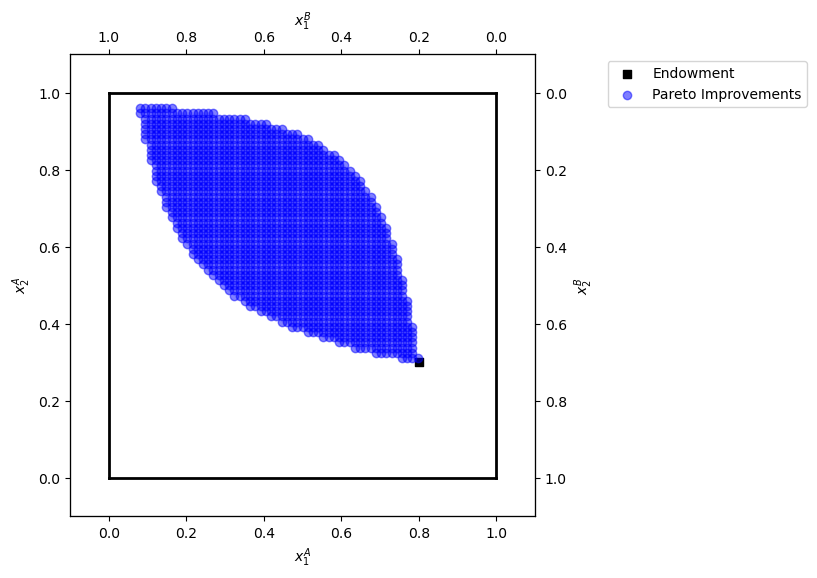

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 1/3
beta = 2/3
N = 75  # Grid size for the plot
omega_A1 = 0.8
omega_A2 = 0.3
w1bar = 1.0
w2bar = 1.0

# Utility functions
def uA(x1, x2):
    return (x1**alpha) * (x2**(1-alpha))

def uB(x1, x2):
    return (x1**beta) * (x2**(1-beta))

# Initial utility
uA_initial = uA(omega_A1, omega_A2)
uB_initial = uB(w1bar - omega_A1, w2bar - omega_A2)

# Figure setup
fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plotting endowment
ax_A.scatter(omega_A1, omega_A2, marker='s', color='black', label='Endowment')

# Plotting Edgeworth Box
ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

# Calculating and plotting the Pareto improvements
x_A1 = np.linspace(0, w1bar, N)
x_A2 = np.linspace(0, w2bar, N)
X_A1, X_A2 = np.meshgrid(x_A1, x_A2)

U_A = uA(X_A1, X_A2)
U_B = uB(w1bar-X_A1, w2bar-X_A2)

pareto_improvement_mask = (U_A >= uA_initial) & (U_B >= uB_initial)

ax_A.scatter(X_A1[pareto_improvement_mask], X_A2[pareto_improvement_mask], color='blue', alpha=0.5, label='Pareto Improvements')

# Adjusting limits and showing plot
ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6, 1.0))
plt.show()

# Question 2

In [4]:
import numpy as np

# Given parameters and initial endowments
alpha = 1/3
beta = 2/3
omega1_A = 0.8
omega2_A = 0.3
omega1_B = 1 - omega1_A
omega2_B = 1 - omega2_A
p2 = 1  # Numeraire

# Define the price range for p1
N = 75
p1_range = np.linspace(0.5, 2.5, N)

# Demand functions for consumer A and B
def demand_A(p1, omega1_A, omega2_A, alpha, p2=1):
    xA1 = alpha * (omega1_A * p1 + omega2_A * p2) / p1
    xA2 = (1 - alpha) * (omega1_A * p1 + omega2_A * p2) / p2
    return xA1, xA2

def demand_B(p1, omega1_B, omega2_B, beta, p2=1):
    xB1 = beta * (omega1_B * p1 + omega2_B * p2) / p1
    xB2 = (1 - beta) * (omega1_B * p1 + omega2_B * p2) / p2
    return xB1, xB2

# Calculate the errors for the market clearing conditions
errors = np.zeros((N, 2))  # Store errors for epsilon1 and epsilon2
for i, p1 in enumerate(p1_range):
    xA1, xA2 = demand_A(p1, omega1_A, omega2_A, alpha)
    xB1, xB2 = demand_B(p1, omega1_B, omega2_B, beta)
    
    epsilon1 = xA1 + xB1 - (omega1_A + omega1_B)
    epsilon2 = xA2 + xB2 - (omega2_A + omega2_B)
    
    errors[i] = [epsilon1, epsilon2]

# Display the first 5 rows of errors as a sample
print(errors)

[[ 0.53333333 -0.26666667]
 [ 0.47521368 -0.25045045]
 [ 0.42276423 -0.23423423]
 [ 0.3751938  -0.21801802]
 [ 0.33185185 -0.2018018 ]
 [ 0.29219858 -0.18558559]
 [ 0.25578231 -0.16936937]
 [ 0.22222222 -0.15315315]
 [ 0.19119497 -0.13693694]
 [ 0.16242424 -0.12072072]
 [ 0.13567251 -0.1045045 ]
 [ 0.11073446 -0.08828829]
 [ 0.08743169 -0.07207207]
 [ 0.06560847 -0.05585586]
 [ 0.04512821 -0.03963964]
 [ 0.02587065 -0.02342342]
 [ 0.00772947 -0.00720721]
 [-0.00938967  0.00900901]
 [-0.02557078  0.02522523]
 [-0.04088889  0.04144144]
 [-0.05541126  0.05765766]
 [-0.06919831  0.07387387]
 [-0.08230453  0.09009009]
 [-0.09477912  0.10630631]
 [-0.10666667  0.12252252]
 [-0.11800766  0.13873874]
 [-0.12883895  0.15495495]
 [-0.13919414  0.17117117]
 [-0.14910394  0.18738739]
 [-0.15859649  0.2036036 ]
 [-0.16769759  0.21981982]
 [-0.17643098  0.23603604]
 [-0.18481848  0.25225225]
 [-0.19288026  0.26846847]
 [-0.20063492  0.28468468]
 [-0.20809969  0.3009009 ]
 [-0.21529052  0.31711712]
 

Explain your code and procedure

In [3]:
# code

# Question 3

In [6]:
import numpy as np
from scipy.optimize import minimize_scalar

# Given parameters
alpha = 1/3
beta = 2/3
omega_A = np.array([0.8, 0.3])
omega_B = 1 - omega_A
p2 = 1

# Utility functions
def uA(x1, x2, alpha=alpha):
    return x1**alpha * x2**(1-alpha)

def uB(x1, x2, beta=beta):
    return x1**beta * x2**(1-beta)

# Demand functions
def demand_A(p1, omega_A, alpha=alpha, p2=p2):
    xA1 = alpha * (p1*omega_A[0] + p2*omega_A[1]) / p1
    xA2 = (1-alpha) * (p1*omega_A[0] + p2*omega_A[1]) / p2
    return np.array([xA1, xA2])

def demand_B(p1, omega_B, beta=beta, p2=p2):
    xB1 = beta * (p1*omega_B[0] + p2*omega_B[1]) / p1
    xB2 = (1-beta) * (p1*omega_B[0] + p2*omega_B[1]) / p2
    return np.array([xB1, xB2])

# Market clearing condition errors
def market_clearing_errors(p1):
    xA = demand_A(p1, omega_A)
    xB = demand_B(p1, omega_B)
    epsilon1 = xA[0] + xB[0] - (omega_A[0] + omega_B[0])
    epsilon2 = xA[1] + xB[1] - (omega_A[1] + omega_B[1])
    return abs(epsilon1) + abs(epsilon2)

# Find market clearing price
result = minimize_scalar(market_clearing_errors, bounds=(0.5, 2.5), method='bounded')

if result.success:
    p1_star = result.x
    print(f"Market clearing price p1*: {p1_star:.4f}")
else:
    print("Optimization was unsuccessful.")

Market clearing price p1*: 0.9444


# Question 4
Explain your code and procedure

In [4]:
# code

Exercise 4a

In [11]:

import numpy as np

# Definer parametre
alpha = 1/3
omega_1A = 0.8
omega_2A = 0.3
p2 = 1  # Numeraire er sat til 1

# Generer listen af priser P1 fra 0.5 til 2.5 med passende intervaller (N=75)
N = 75
P1 = np.linspace(0.5, 2.5, N)

# Definer nyttefunktionen for forbruger A
def uA(x1, x2, alpha=alpha):
    return x1**alpha * x2**(1-alpha)

# Definer efterspørgselsfunktionerne for forbruger A
def demand_A(p1, omega_1A=omega_1A, omega_2A=omega_2A, alpha=alpha):
    xA1_star = alpha * ((omega_1A + p1/p2*omega_2A) / p1)
    xA2_star = (1-alpha) * ((omega_1A + p1/p2*omega_2A) / p2)
    return xA1_star, xA2_star

# Beregn uA for hver pris p1 og gem resultatet
uA_values = []
for p1 in P1:
    xA1_star, xA2_star = demand_A(p1)
    uA_values.append(uA(xA1_star, xA2_star))

# Find den maksimale værdi af uA og den tilsvarende pris p1
max_uA = max(uA_values)
max_uA_index = uA_values.index(max_uA)
max_p1 = P1[max_uA_index]

# Output: Maksimal uA værdi og tilsvarende p1
print(f"Maksimal uA: {max_uA}, ved p1: {max_p1}")

# Anvend efterspørgselsfunktionerne med den optimale pris p1 for at finde fordelingen af gode 1 og gode 2
xA1_star, xA2_star = demand_A(max_p1)

# Output: Fordeling af gode 1 og gode 2 for forbruger A
print(f"Forbruger A's fordeling - Gode 1: {xA1_star}, Gode 2: {xA2_star}")

Maksimal uA: 0.6333333333333333, ved p1: 0.5
Forbruger A's fordeling - Gode 1: 0.6333333333333333, Gode 2: 0.6333333333333334


ADD CONCISE CONLUSION.

Exercise 4b

# Question 5a

In [7]:
from scipy.optimize import minimize
import numpy as np

# Given parameters
alpha = 1/3
beta = 2/3
omega_A1 = 0.8
omega_A2 = 0.3
omega_B1 = 1 - omega_A1
omega_B2 = 1 - omega_A2

# Utility functions
def u_A(x_A1, x_A2, alpha=alpha):
    return x_A1**alpha * x_A2**(1-alpha)

def u_B(x_B1, x_B2, beta=beta):
    return x_B1**beta * x_B2**(1-beta)

# Initial utilities
u_A_initial = u_A(omega_A1, omega_A2)
u_B_initial = u_B(omega_B1, omega_B2)

# Objective function to maximize A's utility, negative for minimization
def objective(x):
    x_A1, x_A2 = x
    return -u_A(x_A1, x_A2)

# Constraints for Pareto improvement
constraints = (
    {'type': 'ineq', 'fun': lambda x: u_A(x[0], x[1]) - u_A_initial},  # A at least as well off
    {'type': 'ineq', 'fun': lambda x: u_B(1-x[0], 1-x[1]) - u_B_initial},  # B at least as well off
    {'type': 'ineq', 'fun': lambda x: x[0]},  # x_A1 >= 0
    {'type': 'ineq', 'fun': lambda x: x[1]},  # x_A2 >= 0
    {'type': 'ineq', 'fun': lambda x: 1 - x[0]},  # x_A1 <= 1
    {'type': 'ineq', 'fun': lambda x: 1 - x[1]}   # x_A2 <= 1
)

# Initial guess
x0 = [omega_A1, omega_A2]

# Perform the optimization
result = minimize(objective, x0, constraints=constraints)

# Extract the optimal allocation
x_A1_opt, x_A2_opt = result.x

x_A1_opt, x_A2_opt, -result.fun

/var/folders/rh/gtw3dzw547q2hf5j320c14zr0000gn/T/ipykernel_30724/2637999194.py:17: RuntimeWarning: invalid value encountered in scalar power
  return x_B1**beta * x_B2**(1-beta)


(0.7000000011041209, 1.0, 0.8879040022094357)

# Question 5b

In [8]:
# Constraints for B being at least as well off, without restrictions on A's choice set
constraints_5b = (
    {'type': 'ineq', 'fun': lambda x: u_B(1-x[0], 1-x[1]) - u_B_initial},  # B at least as well off
    {'type': 'ineq', 'fun': lambda x: x[0]},  # x_A1 >= 0
    {'type': 'ineq', 'fun': lambda x: x[1]},  # x_A2 >= 0
    {'type': 'ineq', 'fun': lambda x: 1 - x[0]},  # x_A1 <= 1
    {'type': 'ineq', 'fun': lambda x: 1 - x[1]}   # x_A2 <= 1
)

# Perform the optimization with new constraints for 5b
result_5b = minimize(objective, x0, constraints=constraints_5b)

# Extract the optimal allocation for 5b
x_A1_opt_5b, x_A2_opt_5b = result_5b.x

x_A1_opt_5b, x_A2_opt_5b, -result_5b.fun

/var/folders/rh/gtw3dzw547q2hf5j320c14zr0000gn/T/ipykernel_30724/2637999194.py:17: RuntimeWarning: invalid value encountered in scalar power
  return x_B1**beta * x_B2**(1-beta)


(0.7000000011041209, 1.0, 0.8879040022094357)

# Question 6

# Question 8